In [35]:
import pandas as pd

In [36]:
df = pd.read_csv('../data/mnist_train.csv')

In [37]:
df.shape

(42000, 785)

In [38]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
import matplotlib.pyplot as plt

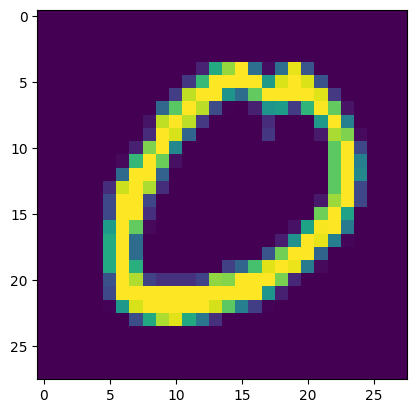

In [40]:
plt.imshow(df.iloc[13051,1:].values.reshape(28,28))

In [41]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [42]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [43]:
from sklearn.neighbors import KNeighborsClassifier

In [44]:
knn = KNeighborsClassifier()

In [45]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [46]:
import time
start = time.time()
y_pred = knn.predict(X_test)
print(time.time() - start)

5.732491970062256


In [47]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9648809523809524

#### Now using PCA

In [48]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [49]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [50]:
# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=100)

In [51]:
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [52]:
X_train_trf.shape

(33600, 100)

In [53]:
knn = KNeighborsClassifier()

In [54]:
knn.fit(X_train_trf,y_train)

KNeighborsClassifier()

In [55]:
y_pred = knn.predict(X_test_trf)

In [56]:
accuracy_score(y_test,y_pred)

0.9544047619047619

In [ ]:
for i in range(1,785):
    pca = PCA(n_components=i)
    X_train_trf = pca.fit_transform(X_train)
    X_test_trf = pca.transform(X_test)
    knn = KNeighborsClassifier()
    knn.fit(X_train_trf,y_train)
    y_pred = knn.predict(X_test_trf)
    print(i,accuracy_score(y_test,y_pred))